# Full Classification Workflow - Kaggle Titanic Dataset

The dataset is from the popular tutorial & competiton on Kaggle: https://www.kaggle.com/c/titanic

In [37]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Problem Description

The dataset contains information about the passengers of the Titanic. The goal is to predict whether a passenger survived or not. Some facts mentioned in the description of the dataset:
- There were a total of 2224 passengers and crew on board the Titanic
- 1502 (67.5%) passengers died, 722 (32.5%) survived
- There was some element of luck in surviving, some groups of people were more likely to survive than others (women, children, upper-class)

### Load & analyze dataset

#### Loading the dataset

First, we load the dataset into a pandas dataframe and take a look at the first few rows and last few rows. We also look at the column names and the data types of each column. to get an idea of the data we are working with.

In [2]:
# load training & test data
train_data = pd.read_csv('datasets/titanic/train.csv')
test_data = pd.read_csv('datasets/titanic/test.csv')

# check data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# print column names
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# print data types & non-null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# print number of null values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the data we loaded and previewed, we can observe the following:
- There are 891 rows and 12 columns in the dataset
- Out of the 12 columns, 5 are numerical and 7 are categorical
- PassengerId is a unique identifier for each passenger
- Survived is the target variable, 0 means the passenger did not survive, 1 means the passenger survived
- We have missing values in the Age, Cabin and Embarked columns

Categorical features include values that are nominal, ordinal, ratio, or interval-based. Among the columns of the dataset, the following are categorical:
- Survived (ordinal)
- Pclass (ordinal)
- Name (nominal)
- Sex (nominal)
- Ticket (nominal)
- Cabin (nominal)
- Embarked (nominal)

Numerical features include values that are discrete, continuous, or timeseries based. Among the columns of the dataset, the following are numerical:
- PassengerId (discrete)
- Age (continuous)
- SibSp (discrete)
- Parch (discrete)
- Fare (continuous)

Out of the features we have, the following are mixed data types:
- Ticket is a mix of numeric and alphanumeric data types. Ticket is a combination of a ticket number and ticket prefix. (AL/5 21171)
- Cabin is alphanumeric.

Features that don't seem to add to the analysis and may be dropped from the dataset:
- PassengerId
- Ticket
- Cabin
- Name

#### Analyzing numerical features

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# count zeros in SibSp & Parch
print(train_data['SibSp'].value_counts())
print(train_data['Parch'].value_counts())

# print percentage of no relatives
no_sibling_percent = train_data['SibSp'].value_counts()[0] / len(train_data['SibSp'])
no_parent_percent = train_data['Parch'].value_counts()[0] / len(train_data['Parch'])

print(f'No siblings: {no_sibling_percent*100:.2f}%')
print(f'No parents: {no_parent_percent*100:.2f}%')


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
No siblings: 68.24%
No parents: 76.09%


In [9]:
# count Pclass
train_data['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

The distribution of numerical feature values across the samples:
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224)
- Survived is a categorical feature with 0 or 1 values, 38% samples survived (similar to actual survival rate of 32%)
- Most passengers travelled without parents, children, or siblings
- The majority of passengers travelled in third class
- Fare distribution is skewed right, most passengers paid less than 31. There seems to be some outliers in the higher fare range
- Age distribution is skewed right, most passengers were in their 20s or 30s. There are some outliers in the higher age range.

#### Analyzing categorical features

In [10]:
# describe categorical data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Some facts about the categorical features:
- Names are unique across the dataset (891 unique names)
- There were more males than females ( % of males is 65.5%)
- Some passengers shared the same ticket number (22% of the passengers shared the same ticket number)
- Some passengers shared the same cabin number
- There were 3 ports of embarkation (S, C, Q) with S being the most common port with 644 passengers embarked (72.4%), C with 168 passengers embarked (18.9%) and Q with 77 passengers embarked (8.6%)



#### Analyzing assumptions from the problem description

In [11]:
# count proportion of survived based on Pclass
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# count proportion of survived based on Sex
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
# count proportion of survived based on Age divided into 2 groups (child under 15 and adult)
age_threhold = 6

child_mask = train_data['Age'] <= age_threhold
adult_mask = train_data['Age'] > age_threhold
child_df = train_data.loc[child_mask]
adult_df = train_data.loc[adult_mask]

# count proportion of survived based on child
child_survival_rate = child_df['Survived'].mean()
print(f'Child Survival Rate: {child_survival_rate*100:.2f}%')

# count proportion of survived based on adult
adult_survival_rate = adult_df['Survived'].mean()
print(f'Adult Survival Rate: {adult_survival_rate*100:.2f}%')



Child Survival Rate: 70.21%
Adult Survival Rate: 38.53%


#### Conclusions related to next steps in data preparation:

**Exlusions / Corrections**
- We exclude the passsengerId as it does not contribute to the survival of the passengers
- We exclude the name as it does not contribute to the survival of the passengers
- We exclude the ticket feature as there are many duplicates (22%)
- We exclude the cabin feature as it is highly incomplete or contains many null values 

**Completion**
Out of the features that have missing values, we need to complete the following:
- Age feature has 177 missing values
- Embarked feature has 2 missing values

**Correlation**
For the remaining features in the dataset, we can test for correlation with the target variable (Survived).

**Creation / Feature Engineering**
We may be able to construct new features out of existing ones to extract more information from the data. For example:
- We can extract family size from the SibSp and Parch features
- We can divide the age into age groups, which will turn the age feature into a categorical feature
- Similarly, we can divide the fare into fare groups, which will turn the fare feature into a categorical feature

**Classifying**
We may be able to classify the passengers into different groups based on the features. For example:
- From the sex features, we can highlight the women as they were more likely to survive
- From the age feature, we can set a threshold to highlight the children as they were more likely to survive
- From the class feature, we can highlight the first class passengers as they were more likely to survive

### Data Visualizations, Observations, Decisions

##### Age Feature

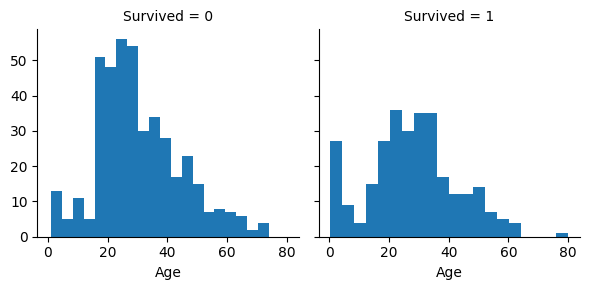

In [14]:
# visualize age vs survival rate using facetgrid histogram
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

**Observations:**
- The age distribution is skewed right, most passengers were in their 20s or 30s
- The age distribution of the survivors is slightly different from the age distribution of the non-survivors
- Children (age <= 4) had a high survival rate
- The oldest passenger survived
- Most passengers in their 20s and 30s survived

**Decisions:**
- We will use the age feature in our model training
- Since there are null values in the age feature, we will need to complete the age feature
- Since survival seems to be correlated with certain age groups, it may be good to replace age with age bands / groups

##### Class Feature

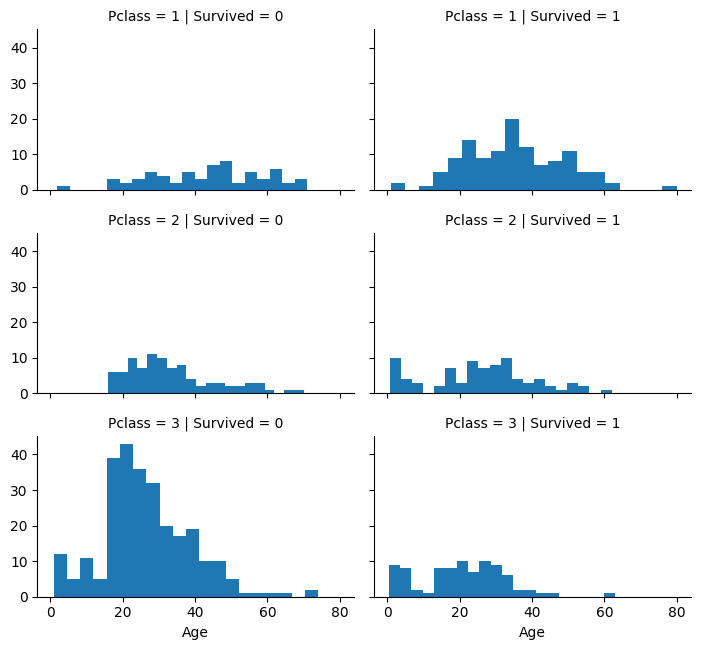

In [15]:
# visualize class vs survival rate using facetgrid histogram
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()
plt.show()

**Observations:**
- Most passengers travelled in third class
- First class passengers had a higher survival rate than second class and third class passengers
- Third class passengers had a lower survival rate than second class and first class passengers
- Most children travelled in third class

**Decisions:**
- We will use the class feature in our model training

#### Embarked & Sex Features

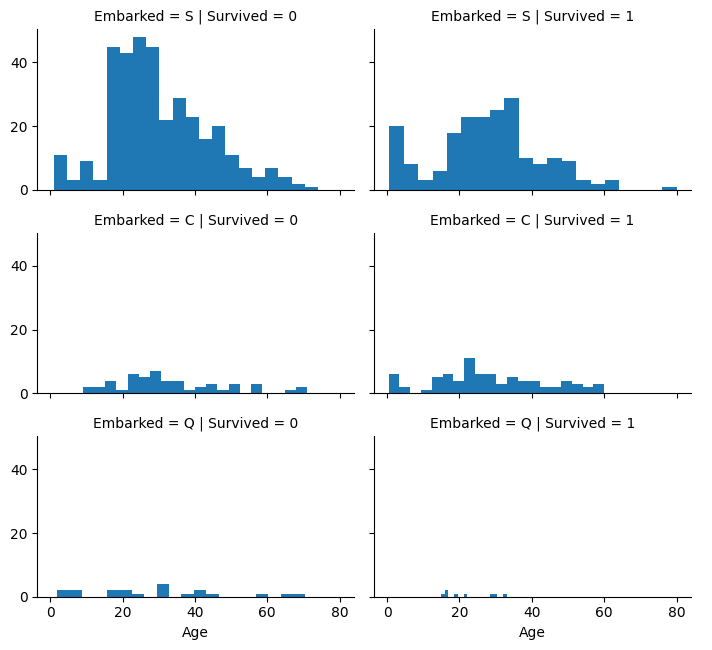

In [16]:
g3 = sns.FacetGrid(train_data, col='Survived', row='Embarked', height=2.2, aspect=1.6)
g3.map(plt.hist, 'Age', bins=20)
g3.add_legend()
plt.show()

In [17]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [18]:
# male dataframe
df_male = train_data.query('Sex == "male"')

df_male[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.305263
2,S,0.174603
1,Q,0.073171


In [19]:
# female dataframe
df_female = train_data.query('Sex == "female"')

df_female[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.876712
1,Q,0.750000
2,S,0.689655


**Observations:**
- Most passengers embarked in Southampton (S)
- Embarkation port seems to be correlated with survival rates, especially when dissecting based on gender
- Gender seems to be correlated with survival rates, women had a higher survival rate than men

**Decisions:**
- We will use the embarked feature in our model training
- We will use sex feature in our model training
- We need to complete the embarked feature as it has 2 null values
- We will replace the embarked feature values with numerical values

### Wrangle Data

##### Drop features that do not contribute to the analysis

In [20]:
# drop unnecessary features from the training dataset
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
# drop unnecessary features from the test dataset
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


##### Convert categorical features

In [22]:
# convert sex to numeric
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [23]:
# fill missing embarked values with most common value
train_data['Embarked'] = train_data['Embarked'].fillna('S')

# convert embarked to numeric
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


##### Create new features based on existing ones

The siblings and parents features seem to be redundant, so we can combine them into a single feature called isAlone. This will categorize passengers as either alone or not alone when travelling, which may be a better indicator of survival than the number of siblings and parents.

In [24]:
# create new feature for isAlone (no siblings or parents)
train_data['isAlone'] = 0
train_data.loc[(train_data['SibSp'] == 0) & (train_data['Parch'] == 0), 'isAlone'] = 1

test_data['isAlone'] = 0
test_data.loc[(test_data['SibSp'] == 0) & (test_data['Parch'] == 0), 'isAlone'] = 1


In [25]:
# drop SibSp & Parch
train_data = train_data.drop(['SibSp', 'Parch'], axis=1)
test_data = test_data.drop(['SibSp', 'Parch'], axis=1)


In [26]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,0
4,0,3,0,35.0,8.0500,0,1


In [27]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,isAlone
0,892,3,0,34.5,7.8292,2,1
1,893,3,1,47.0,7.0000,0,0
2,894,2,0,62.0,9.6875,2,1
3,895,3,0,27.0,8.6625,0,1
4,896,3,1,22.0,12.2875,0,0


##### Complete and categorize numerical features

**Age Feature**

Based on the observations we made earlier, it seems that it will be more accurate if we replace missing age values with the median age of the passengers in the same class and gender. After this, we will categorize the age feature into age bands, as we observed that there were different survival rates for different age groups.

In [28]:
median_age = np.zeros((2,3))

# get median age for each Pclass and gender
for i in range(0,2): #iterate over gender
    for j in range(0,3): #iterate over Pclass
        gender_class_df = train_data[(train_data['Sex'] == i) & (train_data['Pclass'] == j+1)]['Age'].dropna()
        median_age[i,j] = gender_class_df.median()

# fill missing age values with median age
for i in range(0,2): #iterate over gender
    for j in range(0,3): #iterate over Pclass
        train_data.loc[(train_data.Age.isnull()) & (train_data.Sex == i) & (train_data.Pclass == j+1), 'Age'] = median_age[i,j]

# round age to nearest integer
train_data['Age'] = train_data['Age'].astype(int)

train_data.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone
0,0,3,0,22,7.2500,0,0
1,1,1,1,38,71.2833,1,0
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,0
4,0,3,0,35,8.0500,0,1


In [29]:
# test for train age missing values
train_data['Age'].isnull().sum()

0

In [30]:
# repeat for test data
median_age = np.zeros((2,3))

# get median age for each Pclass and
for i in range(0,2): #iterate over gender
    for j in range(0,3): #iterate over Pclass
        gender_class_df = test_data[(test_data['Sex'] == i) & (test_data['Pclass'] == j+1)]['Age'].dropna()
        median_age[i,j] = gender_class_df.median()

# fill missing age values with median age
for i in range(0,2): #iterate over gender
    for j in range(0,3): #iterate over Pclass
        test_data.loc[(test_data.Age.isnull()) & (test_data.Sex == i) & (test_data.Pclass == j+1), 'Age'] = median_age[i,j]

# round age to nearest integer
test_data['Age'] = test_data['Age'].astype(int)

test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,isAlone
0,892,3,0,34,7.8292,2,1
1,893,3,1,47,7.0000,0,0
2,894,2,0,62,9.6875,2,1
3,895,3,0,27,8.6625,0,1
4,896,3,1,22,12.2875,0,0


In [31]:
# test for test age missing values
test_data['Age'].isnull().sum()

0

Change the age feature to ordinal values based on the age bands. We will define the agebands as follows:
- 0 - 10: Child
- 11 - 18: Teenager
- 19 - 25: Young Adult
- 26 - 35: Adult
- 36 - 60: Middle Aged
- 61 & Above: Senior

In [32]:
# replace age with age bands (0-10, 11-18, 19-25, 26-35, 36-60, 61+) in trainig data
train_data.loc[train_data['Age'] <= 10, 'Age'] = 0
train_data.loc[(train_data['Age'] > 10) & (train_data['Age'] <= 18), 'Age'] = 1
train_data.loc[(train_data['Age'] > 18) & (train_data['Age'] <= 25), 'Age'] = 2
train_data.loc[(train_data['Age'] > 25) & (train_data['Age'] <= 35), 'Age'] = 3
train_data.loc[(train_data['Age'] > 35) & (train_data['Age'] <= 60), 'Age'] = 4
train_data.loc[train_data['Age'] > 60, 'Age'] = 5

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone
0,0,3,0,2,7.2500,0,0
1,1,1,1,4,71.2833,1,0
2,1,3,1,3,7.9250,0,1
3,1,1,1,3,53.1000,0,0
4,0,3,0,3,8.0500,0,1


In [33]:
# replace age with age bands (0-10, 11-18, 19-25, 26-35, 36-60, 61+) in test data
test_data.loc[test_data['Age'] <= 10, 'Age'] = 0
test_data.loc[(test_data['Age'] > 10) & (test_data['Age'] <= 18), 'Age'] = 1
test_data.loc[(test_data['Age'] > 18) & (test_data['Age'] <= 25), 'Age'] = 2
test_data.loc[(test_data['Age'] > 25) & (test_data['Age'] <= 35), 'Age'] = 3
test_data.loc[(test_data['Age'] > 35) & (test_data['Age'] <= 60), 'Age'] = 4
test_data.loc[test_data['Age'] > 60, 'Age'] = 5

test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,isAlone
0,892,3,0,3,7.8292,2,1
1,893,3,1,4,7.0000,0,0
2,894,2,0,5,9.6875,2,1
3,895,3,0,3,8.6625,0,1
4,896,3,1,2,12.2875,0,0


**Fare Feature**

Change the fare feature to ordinal values based on the fare bands. We will define the farebands as follows based on the distribution (quartile values) of the fare feature:
- 0 - 7.91: Low
- 7.91 - 14.454: Medium
- 14.454 - 31: High
- 31 & Above: Very High


In [34]:
# replace fare with fare bands (0-7.91, 7.91-14.45, 14.45-31, 31-512) in training data
train_data.loc[train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.45), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.45) & (train_data['Fare'] <= 31), 'Fare'] = 2
train_data.loc[train_data['Fare'] > 31, 'Fare'] = 3
train_data['Fare'] = train_data['Fare'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone
0,0,3,0,2,0,0,0
1,1,1,1,4,3,1,0
2,1,3,1,3,1,0,1
3,1,1,1,3,3,0,0
4,0,3,0,3,1,0,1


In [35]:
# replace null fare values with median fare
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

# replace fare with fare bands (0-7.91, 7.91-14.45, 14.45-31, 31-512) in test data
test_data.loc[test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.45), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.45) & (test_data['Fare'] <= 31), 'Fare'] = 2
test_data.loc[test_data['Fare'] > 31, 'Fare'] = 3
test_data['Fare'] = test_data['Fare'].astype(int)

test_data.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,isAlone
0,892,3,0,3,0,2,1
1,893,3,1,4,0,0,0
2,894,2,0,5,1,2,1
3,895,3,0,3,1,0,1
4,896,3,1,2,1,0,0


### Create the model and predict the test data

In [36]:
# prepare data for model
X_train = train_data.drop(['Survived'], axis=1)
Y_train = train_data['Survived']
X_test = test_data.drop(['PassengerId'], axis=1).copy()

# check the shape of the data
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

LR: 0.799114 (0.034168)
KNN: 0.818202 (0.049351)
CART: 0.815955 (0.034776)
NB: 0.772135 (0.049878)
SVM: 0.814844 (0.051180)
RFC: 0.821573 (0.035902)


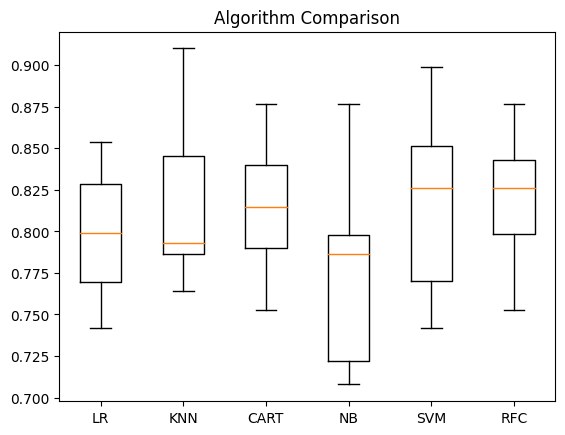

In [39]:
# create a list of models to test
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto', kernel='rbf')))
models.append(('RFC', RandomForestClassifier(n_estimators=100, random_state=0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [40]:
# train each model and make predictions
LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X_train, Y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)

NB = GaussianNB()
NB.fit(X_train, Y_train)

SVM = SVC(gamma='auto', kernel='rbf')
SVM.fit(X_train, Y_train)

RFC = RandomForestClassifier(n_estimators=100, random_state=0)
RFC.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [41]:
# evaluate each model on training data
accuracy_LR = accuracy_score(Y_train, LR.predict(X_train))
accuracy_KNN = accuracy_score(Y_train, KNN.predict(X_train))
accuracy_CART = accuracy_score(Y_train, CART.predict(X_train))
accuracy_NB = accuracy_score(Y_train, NB.predict(X_train))
accuracy_SVM = accuracy_score(Y_train, SVM.predict(X_train))
accuracy_RFC = accuracy_score(Y_train, RFC.predict(X_train))

# print the accuracy of each model
print('Accuracy of Logistic Regression: {:.2f}%'.format(accuracy_LR*100))
print('Accuracy of K Nearest Neighbors: {:.2f}%'.format(accuracy_KNN*100))
print('Accuracy of Decision Tree: {:.2f}%'.format(accuracy_CART*100))
print('Accuracy of Naive Bayes: {:.2f}%'.format(accuracy_NB*100))
print('Accuracy of Support Vector Machine: {:.2f}%'.format(accuracy_SVM*100))
print('Accuracy of Random Forest: {:.2f}%'.format(accuracy_RFC*100))


Accuracy of Logistic Regression: 80.25%
Accuracy of K Nearest Neighbors: 85.75%
Accuracy of Decision Tree: 87.54%
Accuracy of Naive Bayes: 77.22%
Accuracy of Support Vector Machine: 82.72%
Accuracy of Random Forest: 87.54%


### Model Evaluation

Summarize model accuracy and performance on training set

In [43]:
model_accuracy_train = pd.DataFrame({
    'Model': ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': [accuracy_LR, accuracy_KNN, accuracy_CART, accuracy_NB, accuracy_SVM, accuracy_RFC]
})

model_accuracy_train.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Decision Tree,0.875421
5,Random Forest,0.875421
1,K Nearest Neighbors,0.857464
4,Support Vector Machine,0.827160
0,Logistic Regression,0.802469
3,Naive Bayes,0.772166


Make prediction and output on test set

In [44]:
test_predictions = RFC.predict(X_test)

prediction_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

prediction_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
